# WeatherPy
----

### *Important Note - Please Read*
When we went over gmaps in class, nearly everyone was having trouble getting it to run properly. It would also occasionally cause jupyter notebooks to stop working. So our instructor informed us that we would not need to do Part 2 - VacationPy in this assignment. That is why it is not included in the repo.

### Observations


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [16]:
name = []
lat = []
lon = []
max_temp = []
humid = []
clouds = []
wind = []
country = []
date = []

count = 1

print("Beginning Data Retrieval")
print("--------------------------------")

for city in cities:
    response = requests.get(query_url + city).json()
    
    print(f"Processing Record {count} | {city}")
    
    try:
        
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
    except KeyError:
        
        print("City not found. Skipping...")
        
    count = count + 1
    
print("--------------------------------")
print("Data Retrieval Complete")
print("--------------------------------")

Beginning Data Retrieval
--------------------------------
Processing Record 1 | lompoc
Processing Record 2 | vila velha
Processing Record 3 | sambava
Processing Record 4 | tonaya
Processing Record 5 | hermanus
Processing Record 6 | luderitz
Processing Record 7 | longyearbyen
Processing Record 8 | puerto escondido
Processing Record 9 | punta arenas
Processing Record 10 | kapaa
Processing Record 11 | maridi
Processing Record 12 | port alfred
Processing Record 13 | wageningen
Processing Record 14 | albany
Processing Record 15 | santa cruz
Processing Record 16 | srednekolymsk
Processing Record 17 | bethel
Processing Record 18 | rikitea
Processing Record 19 | qaqortoq
Processing Record 20 | busselton
Processing Record 21 | puerto ayora
Processing Record 22 | qaanaaq
Processing Record 23 | chernyshevskiy
Processing Record 24 | quime
Processing Record 25 | castro
Processing Record 26 | yumen
Processing Record 27 | goteborg
City not found. Skipping...
Processing Record 28 | matara
Processing R

Processing Record 233 | tiksi
Processing Record 234 | nelson bay
Processing Record 235 | vardo
Processing Record 236 | belmonte
Processing Record 237 | sola
Processing Record 238 | lashio
Processing Record 239 | belyy yar
Processing Record 240 | suntar
Processing Record 241 | henties bay
Processing Record 242 | ewa beach
Processing Record 243 | matay
Processing Record 244 | saldanha
Processing Record 245 | beloha
Processing Record 246 | ekhabi
Processing Record 247 | kupang
Processing Record 248 | tayturka
Processing Record 249 | cortez
Processing Record 250 | shimoda
Processing Record 251 | pevek
Processing Record 252 | huntington
Processing Record 253 | dalvik
Processing Record 254 | mazatlan
Processing Record 255 | faanui
Processing Record 256 | buala
Processing Record 257 | bandarbeyla
Processing Record 258 | buon me thuot
City not found. Skipping...
Processing Record 259 | porto novo
Processing Record 260 | khoy
Processing Record 261 | alofi
Processing Record 262 | trinidad
Proces

Processing Record 466 | stutterheim
Processing Record 467 | rio grande
Processing Record 468 | chumphon
Processing Record 469 | marsaxlokk
Processing Record 470 | raga
Processing Record 471 | sao felix do xingu
Processing Record 472 | makakilo city
Processing Record 473 | port-gentil
Processing Record 474 | lincoln
Processing Record 475 | sefton
Processing Record 476 | kargala
Processing Record 477 | myaundzha
Processing Record 478 | mareeba
Processing Record 479 | berdigestyakh
Processing Record 480 | kyren
Processing Record 481 | tsabong
Processing Record 482 | lagoa
Processing Record 483 | horconcitos
Processing Record 484 | lavrentiya
Processing Record 485 | imuris
Processing Record 486 | high river
Processing Record 487 | lucapa
Processing Record 488 | duncan
Processing Record 489 | gilgit
Processing Record 490 | yarmouth
Processing Record 491 | katsuura
Processing Record 492 | inhambane
Processing Record 493 | mezdra
Processing Record 494 | libenge
Processing Record 495 | puerto 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
columns = {
    'City': name,
    'Lat': lat,
    'Lng': lon,
    'Max Temp': max_temp,
    'Humidity': humid,
    'Cloudiness': clouds,
    'Wind Speed': wind,
    'Country': country,
    'Date': date
}

cities_df = pd.DataFrame(columns)

cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lompoc,34.6391,-120.4579,15.00,63,2,7.20,US,1619225832
1,Vila Velha,-20.3297,-40.2925,25.00,73,75,3.60,BR,1619225606
2,Sambava,-14.2667,50.1667,22.41,86,100,3.62,MG,1619225833
3,Tonaya,19.7833,-103.9667,29.00,32,1,5.14,MX,1619225833
4,Hermanus,-34.4187,19.2345,13.33,90,91,1.85,ZA,1619225833


In [19]:
cities_df[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Date']].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,19.286593,20.982485,15.913834,68.407599,50.709845,3.444905,1.619226e+09
std,33.880013,90.690789,10.390345,22.282699,40.002492,2.370382,1.030192e+02
min,-54.800000,-175.200000,-13.110000,7.000000,0.000000,0.120000,1.619225e+09
25%,-9.044250,-58.472900,7.985000,55.500000,7.000000,1.790000,1.619226e+09
50%,23.216700,22.401000,18.000000,74.000000,42.000000,2.710000,1.619226e+09
75%,46.954050,101.822200,25.165000,86.000000,92.000000,4.630000,1.619226e+09
max,78.218600,179.316700,32.020000,100.000000,100.000000,14.970000,1.619226e+09


In [20]:
cities_df.to_csv(r'output_data/cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
According to the summary table, the maximum value for humidity is 100. There are no cities with humidity > 100%, so we do not need to remove any outliers.

In [21]:
cities_df[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Date']].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,19.286593,20.982485,15.913834,68.407599,50.709845,3.444905,1.619226e+09
std,33.880013,90.690789,10.390345,22.282699,40.002492,2.370382,1.030192e+02
min,-54.800000,-175.200000,-13.110000,7.000000,0.000000,0.120000,1.619225e+09
25%,-9.044250,-58.472900,7.985000,55.500000,7.000000,1.790000,1.619226e+09
50%,23.216700,22.401000,18.000000,74.000000,42.000000,2.710000,1.619226e+09
75%,46.954050,101.822200,25.165000,86.000000,92.000000,4.630000,1.619226e+09
max,78.218600,179.316700,32.020000,100.000000,100.000000,14.970000,1.619226e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

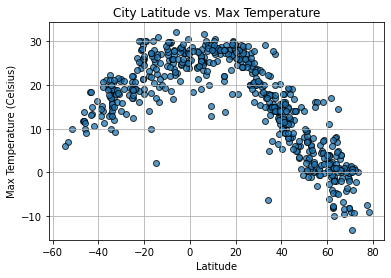

In [33]:
plt.scatter(cities_df['Lat'], cities_df['Max Temp'], facecolors='tab:blue', edgecolors='black', alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.title("City Latitude vs. Max Temperature")
plt.grid()
plt.show()

This plot compares the latitude and max temperature of each city. This helps visualize how temperatures are higher the closer you are to the equator (where latitudes are closer to 0).

## Latitude vs. Humidity Plot

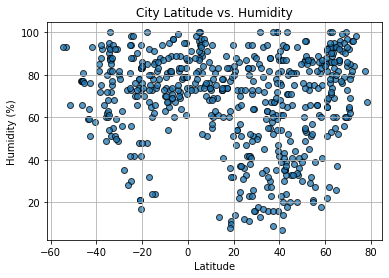

In [34]:
plt.scatter(cities_df['Lat'], cities_df['Humidity'], facecolors='tab:blue', edgecolors='black', alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()
plt.show()

Though this plot is not quite as clear as the previous one, this shows that humidity levels are also higher the closer you are to the equator.

## Latitude vs. Cloudiness Plot

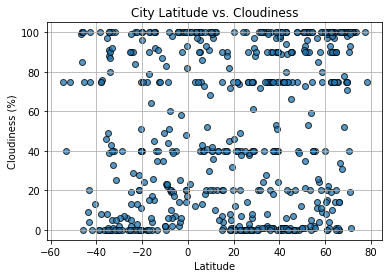

In [35]:
plt.scatter(cities_df['Lat'], cities_df['Cloudiness'], facecolors='tab:blue', edgecolors='black', alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()
plt.show()

Cloudiness compared to latitude is much more varied. There does not appear to be a clear trend or correlation between the two.

## Latitude vs. Wind Speed Plot

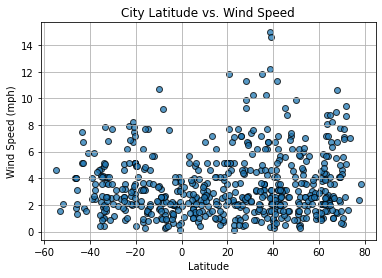

In [36]:
plt.scatter(cities_df['Lat'], cities_df['Wind Speed'], facecolors='tab:blue', edgecolors='black', alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()
plt.show()

Similar to the previous plot, wind speed compared to latitude is pretty varied. However, there does appear to be a slight dip in wind speeds in cities between 0 and 20 degrees latitude.

## Linear Regression

In [38]:
north_hem = cities_df.loc[cities_df['Lat'] >= 0, ['Lat', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]

north_hem

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,34.6391,15.00,63,2,7.20
3,19.7833,29.00,32,1,5.14
6,78.2186,-9.00,67,75,3.60
7,15.8500,29.00,74,40,2.00
9,22.0752,26.00,65,40,6.69
...,...,...,...,...,...
572,34.7961,13.03,32,99,0.75
573,58.6881,3.31,75,80,1.23
574,60.0625,3.93,84,100,2.89
577,62.5903,7.52,90,100,3.90


In [39]:
south_hem = cities_df.loc[cities_df['Lat'] < 0, ['Lat', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]

south_hem

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
1,-20.3297,25.00,73,75,3.60
2,-14.2667,22.41,86,100,3.62
4,-34.4187,13.33,90,91,1.85
5,-26.6481,17.60,73,6,2.44
8,-53.1500,7.00,93,40,1.54
...,...,...,...,...,...
562,-6.6603,22.88,97,19,0.92
568,-13.2000,21.43,86,91,1.31
569,-6.1219,32.02,60,17,0.45
575,-38.9250,14.44,85,0,4.02


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8087509359626031


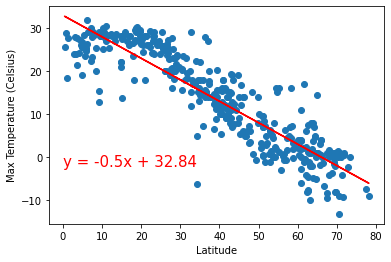

In [43]:
x_values = north_hem['Lat']
y_values = north_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0,-2), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5318707725675732


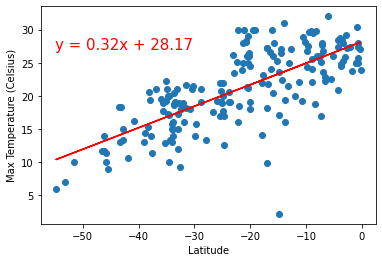

In [45]:
x_values = south_hem['Lat']
y_values = south_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,27), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")

print(f"The r-value is: {rvalue**2}")
plt.show()

The distinction between the northern and southern hemispheres in terms of max temperature is pretty clear. In the northern hemisphere, max temperature decreases as latitude increases. In the southern hemisphere, max temperature increases as latitude increases. This is another good visualization of how temperatures increase the closer you are to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.005196609391390659


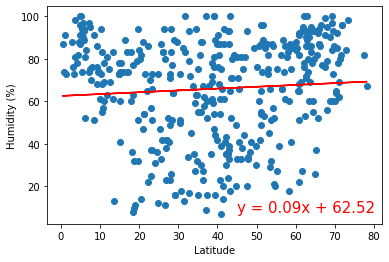

In [49]:
x_values = north_hem['Lat']
y_values = north_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (45,8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0034006849646675027


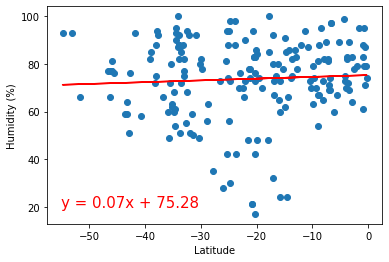

In [50]:
x_values = south_hem['Lat']
y_values = south_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-value is: {rvalue**2}")
plt.show()

Similar to the original humidity vs. latitude plot, these two plots show little to no distinction. The linear regression on both of these is very slight. However, both plots do show that latitudes closer to 0 have a humidity percentage of 60 or above.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.011187020670329036


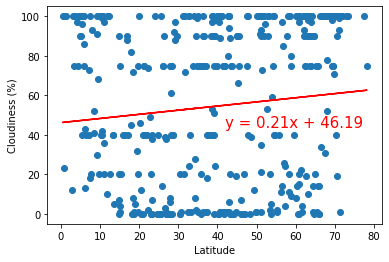

In [55]:
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (42,44), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0005283698685541332


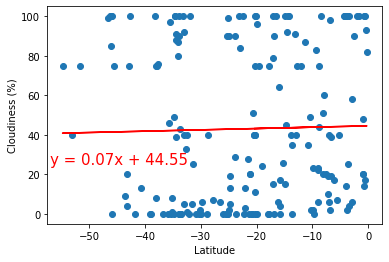

In [61]:
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-57,25), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"The r-value is: {rvalue**2}")
plt.show()

These plots give the same impression as the original one. Cloudiness does not seem to be correlated with latitude. The linear regressions are very slight, and there is no clear trend in either plot.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.010540404740500447


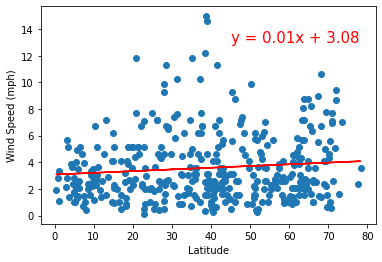

In [63]:
x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (45,13), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.024557006515707663


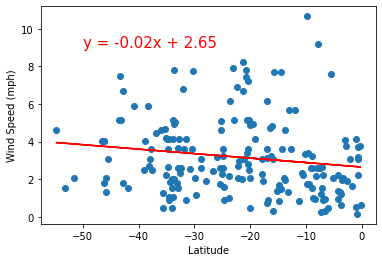

In [66]:
x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,9), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The r-value is: {rvalue**2}")
plt.show()

There is a very slight increase in wind speed in the northern hemisphere the further you get from zero. Similarly, there is a slight decrease in wind speed in the southern hemisphere the further you get from zero. Both of these plots show that cities with latitudes close to zero have lesser wind speeds.